In [289]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [160]:
# Load dataset
df = pd.read_csv("/content/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [161]:
# Removing the Id column since it's just a place holder
df.pop("Id")
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


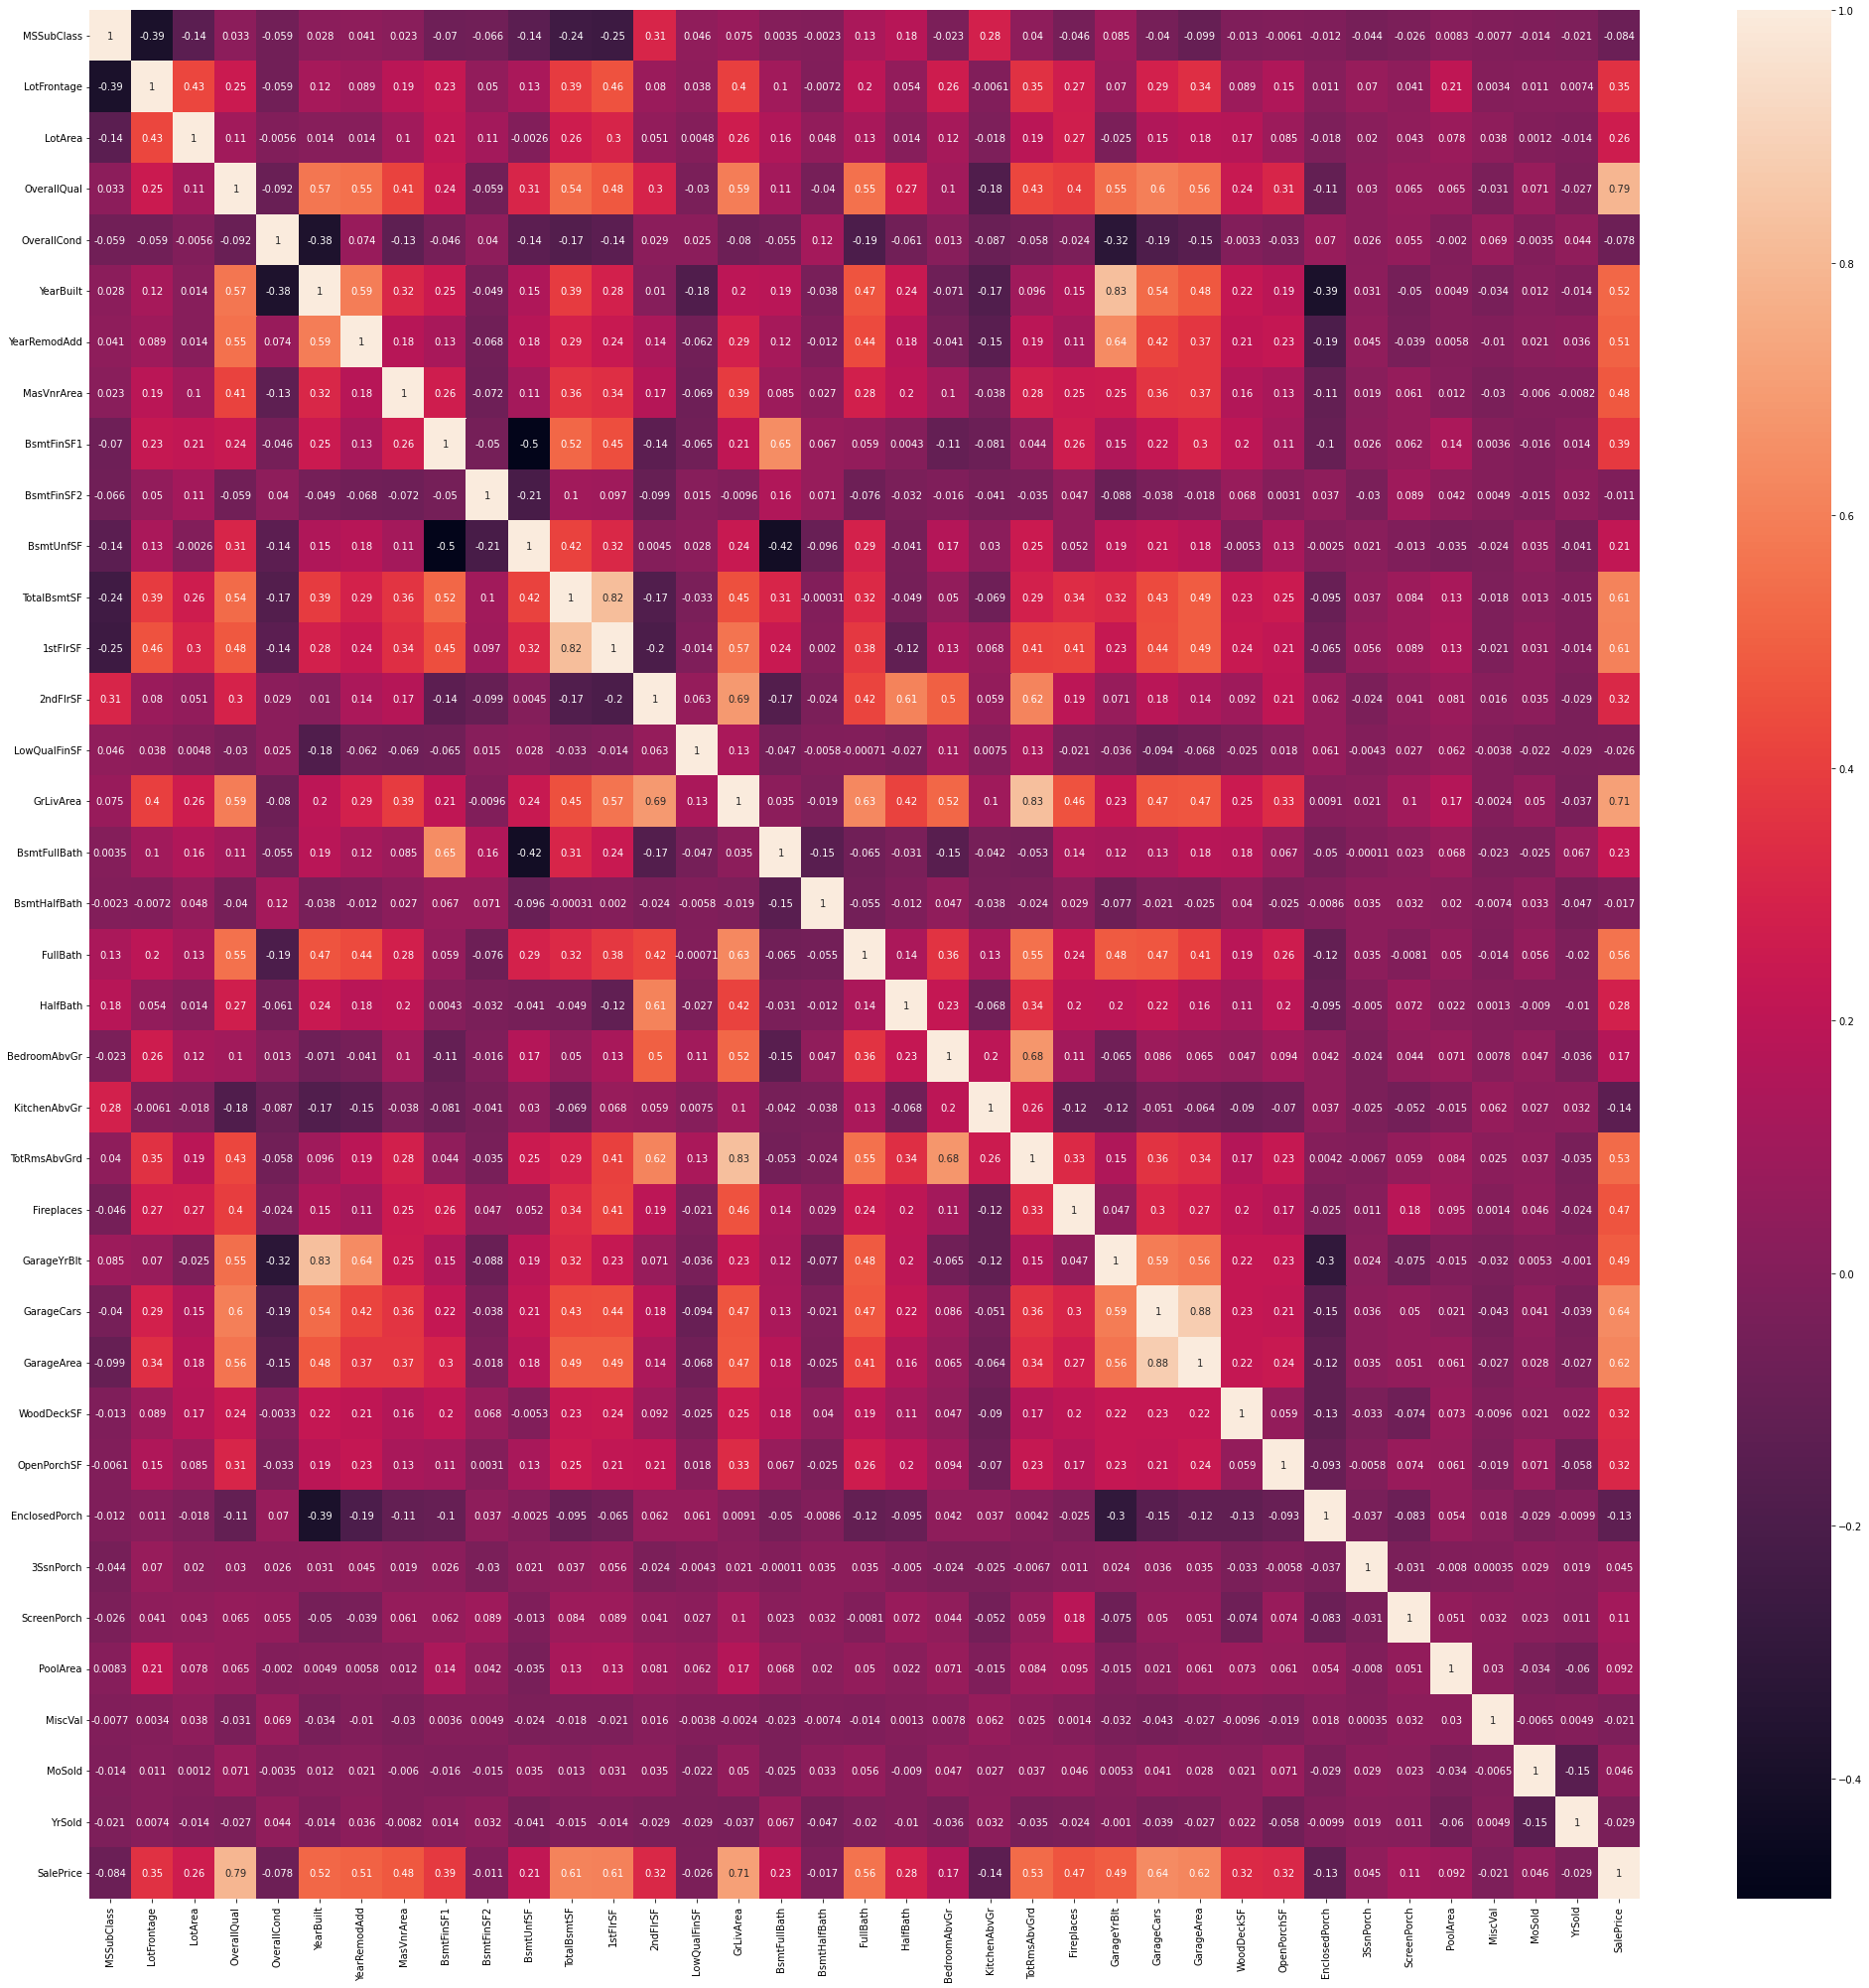

In [162]:
# Create a scatterplot to show correlation between sales price and other features.
plt.figure(figsize = (35,35))
sns.heatmap(df.corr(), annot = True)



---


Looking at correlations to SalePrice, we can see that OverallQuality, TotalBsmtSF, 1stFlrSF, GrLiveArea, GarageCars, and GarageArea are some of the highest correlating features when comparing them to sales price.


---



In [163]:
# Removing all columns that are not numeric 
df = df.select_dtypes(exclude=['object'])
# Checking to see instances of null values in the dataset.
df.isna().sum()[df.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [164]:
# Remove instances of null values from the dataset
df = df.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)
df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125




---
**Experiment 1: Linear Regression**
---

---




In [348]:
#setting up training dataset 80:20 split
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
x_train, x_test, y_train, y_test, = train_test_split(x, y, train_size = 0.2)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [344]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [-8.49775152e+01  8.26302438e-01  1.35307001e+04  3.03033200e+03
  4.69431694e+02  3.11828683e+02  2.21612419e+01 -3.86421093e-01
  1.17166479e+00  2.29464856e+01  1.64269868e+01  1.41146454e+01
  2.58186105e+01  5.63602427e+01  4.08785993e+02 -5.89759393e+03
 -5.70540324e+03 -2.71882406e+03 -8.81230741e+03 -2.76891898e+04
  8.89874129e+02  1.89092087e+03  7.63251364e+03 -7.95720646e+00
  1.75936447e+01  2.39047519e+01  1.68081787e+01  4.23582091e+02
  1.29746157e+02 -1.64737373e+02 -6.32634838e+00 -4.29955668e+02
 -1.67846461e+03]


In [345]:
y_predicted = lr.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
print('Mean squared error: \n', mse)

Mean squared error: 
 1788594083.1723776


In [346]:
print('square root mean squared error: \n', np.sqrt(mse))

square root mean squared error: 
 42291.77323277398


In [349]:
print('Accuracy: \n', lr.score(x_test, y_test))

Accuracy: 
 0.7473760731786685




---

**Experiment 2: Ridge**
---
---

In [319]:
clf = Ridge(alpha = 0.1)
clf.fit(x_train,y_train)
Ridge()

Ridge()

In [320]:
y_predicted = clf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
print('Mean squared error: \n', mse)

Mean squared error: 
 1583345059.5846407


In [321]:
print('square root mean squared error: \n', np.sqrt(mse))

square root mean squared error: 
 39791.26863502395


In [322]:
print('Accuracy: \n', clf.score(x_test, y_test))

Accuracy: 
 0.7551217420085277


---
**Experiment 3: Lasso**
---
---

In [331]:
clf = Lasso(alpha = 1)
clf.fit(x_train,y_train)
Lasso()

Lasso()

In [332]:
y_predicted = clf.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
print('Mean squared error: \n', mse)

Mean squared error: 
 1583455389.6345913


In [333]:
print('square root mean squared error: \n', np.sqrt(mse))

square root mean squared error: 
 39792.65497091883


In [334]:
print('Accuracy: \n', clf.score(x_test, y_test))

Accuracy: 
 0.7551046784946256
